<a href="https://colab.research.google.com/github/Shashwat-arch/Letter_recognition_using_SVM/blob/main/Letter_Recognition_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear SVM

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import validation_curve, KFold, cross_val_score, GridSearchCV

In [7]:
letter_df = pd.read_csv("/content/6. letter-recognition.csv", sep=",")

In [8]:
letter_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
Aphabet_map = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8, "I":9,
               "J":10, "K":11, "L":12, "M":13, "N":14, "O":15, "P":16, "Q":17, "R":17, "S":19,
               "T":20, "U":21, "V":22, "W":23, "X":24, "Y":25, "Z":26}

In [10]:
letter_df["letter_no"] = letter_df["letter"].apply(lambda x: ord(x) - ord('A')+1)

In [11]:
letter_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter_no
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,20
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,9
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,4
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,14
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,7


In [13]:
letter_df.drop("letter", axis=1, inplace=True)

In [14]:
letter_df.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter_no
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,20
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,9
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,4
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,14
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,7


In [18]:
letter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   xbox       20000 non-null  int64
 1   ybox       20000 non-null  int64
 2   width      20000 non-null  int64
 3   height     20000 non-null  int64
 4   onpix      20000 non-null  int64
 5   xbar       20000 non-null  int64
 6   ybar       20000 non-null  int64
 7   x2bar      20000 non-null  int64
 8   y2bar      20000 non-null  int64
 9   xybar      20000 non-null  int64
 10  x2ybar     20000 non-null  int64
 11  xy2bar     20000 non-null  int64
 12  xedge      20000 non-null  int64
 13  xedgey     20000 non-null  int64
 14  yedge      20000 non-null  int64
 15  yedgex     20000 non-null  int64
 16  letter_no  20000 non-null  int64
dtypes: int64(17)
memory usage: 2.6 MB


In [19]:
letter_df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter_no
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120,13.516750
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747,7.502175
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000,7.000000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000,14.000000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000,20.000000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000,26.000000


In [15]:
letter_df.isnull().sum()

xbox         0
ybox         0
width        0
height       0
onpix        0
xbar         0
ybar         0
x2bar        0
y2bar        0
xybar        0
x2ybar       0
xy2bar       0
xedge        0
xedgey       0
yedge        0
yedgex       0
letter_no    0
dtype: int64

In [26]:
X = letter_df.drop("letter_no", axis=1)
y = letter_df.letter_no.values.astype(int)

In [27]:
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [28]:
print(y)

[20  9  4 ... 20 19  1]


In [29]:
X_scaled = scale(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5)

In [31]:
model = SVC(C=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[247,   0,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   2,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 219,   0,   2,   2,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   1,   1,   0,   0,   0,   1,   0,   0],
       [  0,   0, 203,   0,   2,   0,   6,   1,   0,   0,   0,   0,   0,
          0,   4,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   5,   0, 216,   0,   0,   0,   3,   0,   1,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   2,   3,   0, 209,   0,   6,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,   1],
       [  0,   2,   0,   1,   2, 220,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   6,   0,   0,   1,   2,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   3,   1,   0, 219,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   

In [40]:
print("accuracy", metrics.accuracy_score(y_test, y_pred))

print("precision", metrics.precision_score(y_test, y_pred, average="weighted"))

print("recall", metrics.recall_score(y_test, y_pred, average="weighted"))

accuracy 0.9408333333333333
precision 0.9427121403550193
recall 0.9408333333333333


## Hyperparameter Tuning

In [41]:
folds = KFold(n_splits=5, shuffle=True, random_state=5)

model = SVC(C=1)

In [42]:
cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring="accuracy")

In [43]:
print(cv_results)

print("mean accuracy = {}".format(cv_results.mean()))

[0.93178571 0.93607143 0.93       0.93642857 0.92964286]
mean accuracy = 0.9327857142857143


In [44]:
params = {"C":[0.1, 1, 10, 100, 1000]}

model = SVC()

model_cv = GridSearchCV(estimator=model, param_grid=params,
                        scoring="accuracy",
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

In [45]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.321483,2.280672,3.395763,1.114046,0.1,{'C': 0.1},0.814286,0.816786,0.819286,0.818571,...,0.816000,0.003008,5,0.828036,0.827589,0.831518,0.827232,0.830446,0.828964,0.001701
1,1.936755,0.012288,1.992058,0.375777,1,{'C': 1},0.931786,0.936071,0.930000,0.936429,...,0.932786,0.002922,4,0.953571,0.951786,0.952679,0.952589,0.953661,0.952857,0.000694
2,3.195086,1.221914,2.085094,0.590109,10,{'C': 10},0.959286,0.966071,0.964643,0.962143,...,0.962714,0.002397,3,0.992768,0.992143,0.991875,0.992143,0.993393,0.992464,0.000549
3,3.082455,1.307354,1.991108,0.573043,100,{'C': 100},0.963929,0.966071,0.966429,0.960000,...,0.964571,0.002468,1,0.999911,0.999821,1.000000,0.999911,0.999732,0.999875,0.000091
4,2.787179,0.919139,2.054808,1.071195,1000,{'C': 1000},0.963214,0.963929,0.966786,0.959286,...,0.963786,0.002581,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


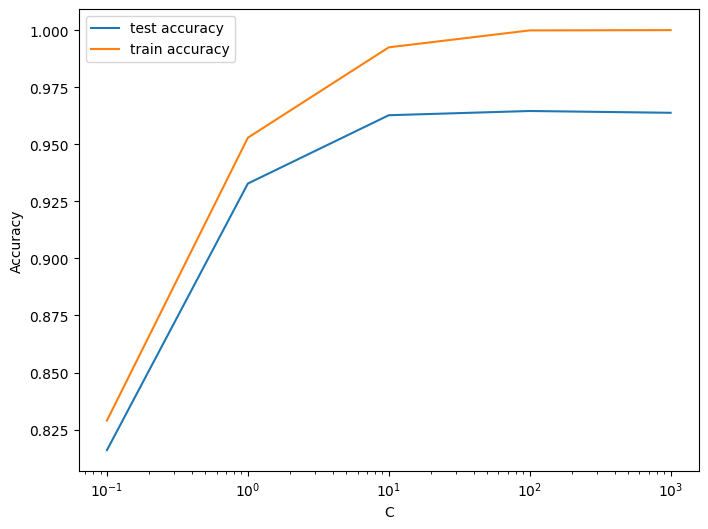

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [49]:
best_score = model_cv.best_score_

best_C = model_cv.best_params_['C']

print("The Highest test accuracy is {0} at C = {1}". format(best_score, best_C))

The Highest test accuracy is 0.9645714285714286 at C = 100


In [50]:
model = SVC(C=best_C)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [53]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred, average="weighted"))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average="weighted"))

accuracy 0.969
precision 0.9691623173976496
recall 0.969


## Results For Linear SVM

- Accuracy: 96.9%
- precision: 96.9%
- recall: 96.9%

# Non-Linear SVM

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, validation_curve
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [6]:
letter_df = pd.read_csv("/content/6. letter-recognition.csv", sep=",")

In [7]:
letter_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
letter_df["letter_no"] = letter_df["letter"].apply(lambda x: ord(x) - ord('A')+1)

In [9]:
letter_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter_no
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,20
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,9
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,4
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,14
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,7


In [10]:
letter_df.drop("letter", axis=1, inplace=True)

In [12]:
X = letter_df.drop("letter_no", axis=1)
y = letter_df.letter_no.values.astype(int)

In [13]:
X_scaled = scale(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5)

In [23]:
model = SVC(C=1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[247,   0,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   2,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 219,   0,   2,   2,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   1,   1,   0,   0,   0,   1,   0,   0],
       [  0,   0, 203,   0,   2,   0,   6,   1,   0,   0,   0,   0,   0,
          0,   4,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   5,   0, 216,   0,   0,   0,   3,   0,   1,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   2,   3,   0, 209,   0,   6,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,   1],
       [  0,   2,   0,   1,   2, 220,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   6,   0,   0,   1,   2,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   3,   1,   0, 219,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   

In [25]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_test, y_pred, average="weighted"))

Accuracy:  0.9408333333333333
Precision:  0.9427121403550193
Recall:  0.9408333333333333


## Hyperparameter Tuning

-Hyperparameters: C, gamma, choice of kernel

In [30]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=5)

hyper_params = [{"gamma":[1e-2, 1e-3, 1e-4],
                "C":[1, 10, 100, 1000]}]

model = SVC(kernel='rbf')

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_params,
                        scoring="accuracy",
                        cv=kfolds,
                        verbose=1,
                        return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.570444,0.368730,2.189836,0.057507,1,0.01,"{'C': 1, 'gamma': 0.01}",0.838929,0.837857,0.837857,...,0.835286,0.003652,7,0.844018,0.844375,0.846786,0.845714,0.847589,0.845696,0.001366
1,5.641941,0.424365,2.934865,0.300780,1,0.001,"{'C': 1, 'gamma': 0.001}",0.683214,0.689286,0.685000,...,0.681929,0.005841,10,0.690000,0.684911,0.691429,0.685714,0.690804,0.688571,0.002711
2,10.544110,0.237910,3.248190,0.378375,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.189643,0.222857,0.225357,...,0.225214,0.020870,12,0.196429,0.225000,0.235357,0.243839,0.267857,0.233696,0.023397
3,1.524828,0.131861,1.620001,0.306190,10,0.01,"{'C': 10, 'gamma': 0.01}",0.908929,0.917143,0.906071,...,0.908643,0.004831,3,0.926607,0.926071,0.928750,0.927679,0.930268,0.927875,0.001509
4,2.625610,0.358253,2.390167,0.287179,10,0.001,"{'C': 10, 'gamma': 0.001}",0.813214,0.822500,0.812500,...,0.813643,0.004620,8,0.822054,0.818661,0.824464,0.823571,0.824911,0.822732,0.002258
5,5.593707,0.437893,2.864954,0.320986,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.683214,0.689286,0.683571,...,0.681571,0.006327,11,0.689286,0.684464,0.690000,0.685714,0.690804,0.688054,0.002499
6,1.792560,0.355042,1.177469,0.133773,100,0.01,"{'C': 100, 'gamma': 0.01}",0.940714,0.952143,0.946429,...,0.944286,0.004738,2,0.979643,0.977857,0.977054,0.978036,0.977946,0.978107,0.000844
7,1.812692,0.194357,1.668473,0.262942,100,0.001,"{'C': 100, 'gamma': 0.001}",0.857500,0.866429,0.857143,...,0.859000,0.004537,5,0.877232,0.876250,0.876518,0.878125,0.879107,0.877446,0.001054
8,2.624305,0.352904,2.390655,0.274758,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.804286,0.812857,0.808214,...,0.807143,0.003312,9,0.816161,0.812589,0.820089,0.818571,0.821518,0.817786,0.003146
9,1.997672,0.271371,1.041608,0.105172,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.947857,0.949643,0.953214,...,0.950000,0.002682,1,0.996875,0.996518,0.996964,0.996875,0.997411,0.996929,0.000286


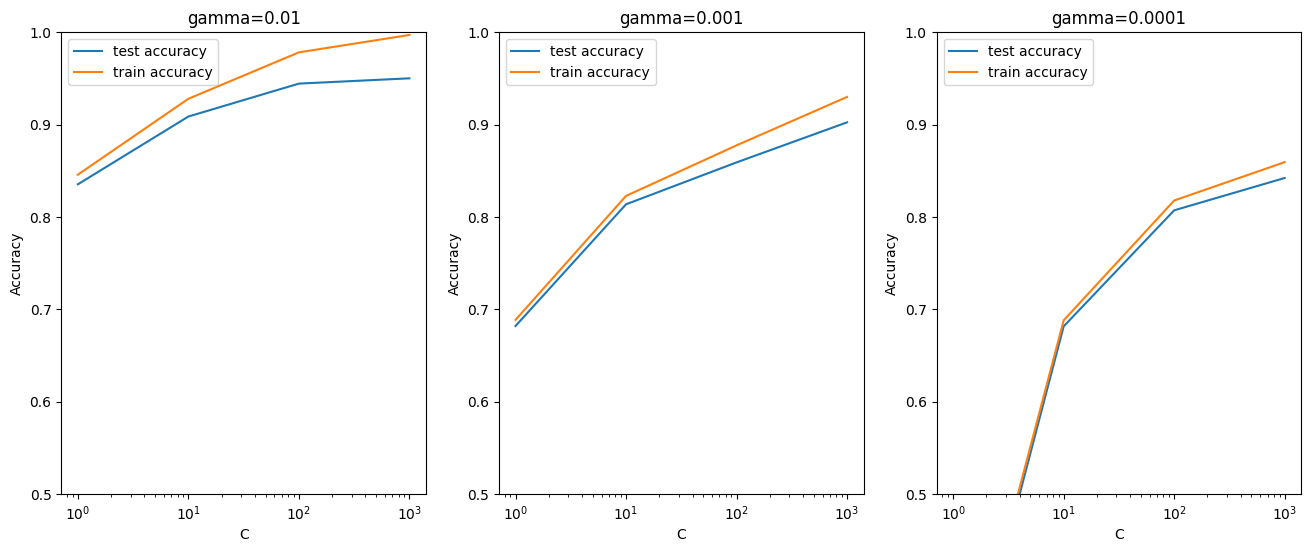

In [33]:
cv_results['param_C'] = cv_results['param_C'].astype(int)

plt.figure(figsize=(16, 6))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01['param_C'], gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('gamma=0.01')
plt.ylim(0.50, 1)
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001['param_C'], gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'], gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('gamma=0.001')
plt.ylim(0.50, 1)
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'], gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'], gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('gamma=0.0001')
plt.ylim(0.50, 1)
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [34]:
best_score = model_cv.best_score_
best_params = model_cv.best_params_

print("The best score is {0} corresponding to the hyperparameters: {1}".format(best_score, best_params))

The best score is 0.95 corresponding to the hyperparameters: {'C': 1000, 'gamma': 0.01}


In [35]:
model = SVC(C=100, kernel='rbf', gamma=0.01)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [38]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100, "%")

print("Precision: ", metrics.precision_score(y_test, y_pred, average="weighted")*100, "%")

print("Recall: ", metrics.recall_score(y_test, y_pred, average="weighted")*100, "%")

Accuracy:  94.76666666666667 %
Precision:  94.86103558455888 %
Recall:  94.76666666666667 %


## Results of Non-linear SVM:
  - Accuracy: 94.7%
  - precision: 94.8%
  - Recall: 94.7%

# Conclusion:
  - As it turns out the score of the non-linear model is less compared to the linear model.
  - But from the Gamma plot, we can see that if we decrease the gamma value (non-linearity) very low, then the performance of the model also decreases.
  - Overall, due the curvelinear nature of the given data (Handwriting), a non-linear model would be more suitable, as it too has a respectable accuracy of 95%.